In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('tweets.csv')

In [3]:
print(data.shape)
data.head()

(1851563, 10)


user        fullname            tweet-id            timestamp  \
0  julia_vaingurt  Julia Vaingurt  746855460402302976  2016-06-25 23:59:52   
1         haj1106          hunter  746855393695924224  2016-06-25 23:59:36   
2          rimbit       Rimbit  ➡  746855315589652480  2016-06-25 23:59:17   
3     coinstories    Coin Stories  746855306026680321  2016-06-25 23:59:15   
4    bitcointonic    Julia Edling  746855274816798720  2016-06-25 23:59:08   

                                         url  likes  replies  retweets  \
0  /julia_vaingurt/status/746855460402302976      0        0         0   
1         /haj1106/status/746855393695924224      0        0         0   
2          /rimbit/status/746855315589652480      0        0         0   
3     /coinstories/status/746855306026680321      0        0         0   
4    /bitcointonic/status/746855274816798720      1        0         1   

                                                text  \
0  Bitcoin: Pissed-off customers sue GAW Miners i...   
1  I'm not gone lie I be staring at pplwhat btc's...   
2  Did you miss Beyond Bitcoin Hangout? I CANNOT ...   
3  What are the merits and risks of investing in ...   
4  Hash Ocean #Bitcoin Cloud Mining №1 in the wor...   

                                                html  
0  <p class="TweetTextSize js-tweet-text tweet-te...  
1  <p class="TweetTextSize js-tweet-text tweet-te...  
2  <p class="TweetTextSize js-tweet-text tweet-te...  
3  <p class="TweetTextSize js-tweet-text tweet-te...  
4  <p class="TweetTextSize js-tweet-text tweet-te...

In [4]:
data['timestamp'] = pd.to_datetime(data['timestamp']) 

In [11]:
data = data[(data['timestamp'] > '2018-01-01 00:00:01') & (data['timestamp'] < '2019-01-01 00:00:01')]
data.shape

(852286, 10)

In [12]:
def clean_tweet(tweet):
    tweet = emoji.demojize(tweet) # translate emojis
#     print(tweet)
    tweet = re.sub('http\S+\s*', '', tweet)  # remove URLs
    tweet = re.sub('RT|cc', '', tweet)  # remove RT and cc
    tweet = re.sub('#\S+', '', tweet)  # remove hashtags
    tweet = re.sub('@\S+', '', tweet)  # remove mentions
    tweet = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', tweet)  # remove punctuations
    tweet = re.sub('\s+', ' ', tweet)  # remove extra whitespace
    return tweet

In [13]:
import re
import emoji
data.text = data.text.apply(lambda x : clean_tweet(str(x)))
data.text = data.text.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

user                        fullname             tweet-id  \
9351     yamtmemb_btc             サーモンタタ・タツヤちゃんDARUMA  1046912636435103745   
9352           joti10                jonatan gonzalez  1046912629246242816   
9353       cryptow1re  Cryptowire {BTC Class of 2013}  1046912612657770496   
9354   maicontavora33                   maicon tavora  1046912608450875392   
9355  CryptoCoinsRepo              CryptoCoinsReports  1046912597726023680   

               timestamp                                          url  likes  \
9351 2018-10-01 23:59:57     /yamtmemb_btc/status/1046912636435103745      0   
9352 2018-10-01 23:59:56           /joti10/status/1046912629246242816      0   
9353 2018-10-01 23:59:52       /cryptow1re/status/1046912612657770496      0   
9354 2018-10-01 23:59:51   /maicontavora33/status/1046912608450875392      0   
9355 2018-10-01 23:59:48  /CryptoCoinsRepo/status/1046912597726023680      0   

      replies  retweets                                               text  \
9351        1         0                                       また精度高いやつきたなw   
9352        0         0  gusta compres mierda pides gobierno Dicom cons...   
9353        0         0  reddit China’s Oldest Tech Magazine Aepting Pa...   
9354        0         0  revolution continues airdrop still running tok...   
9355        0         0  Prominent Exec FOMO Will Drive Next Crypto Bul...   

                                                   html  
9351  <p class="TweetTextSize js-tweet-text tweet-te...  
9352  <p class="TweetTextSize js-tweet-text tweet-te...  
9353  <p class="TweetTextSize js-tweet-text tweet-te...  
9354  <p class="TweetTextSize js-tweet-text tweet-te...  
9355  <p class="TweetTextSize js-tweet-text tweet-te...

In [14]:
print(data.shape)
data = data.drop_duplicates(subset='text', keep='first')
print(data.shape)

(852286, 10)
(619432, 10)


In [15]:
import nltk 
import spacy
nlp_tokenizer = spacy.load("en_core_web_sm")

In [16]:
import nltk 
tokenized_tweet = data.text.apply(lambda x:  nltk.word_tokenize(x))
tokenized_tweet.head()

9351                                       [また精度高いやつきたなw]
9352    [gusta, compres, mierda, pides, gobierno, Dico...
9353    [reddit, China, ’, s, Oldest, Tech, Magazine, ...
9354    [revolution, continues, airdrop, still, runnin...
9355    [Prominent, Exec, FOMO, Will, Drive, Next, Cry...
Name: text, dtype: object

In [17]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

9351                                       [また精度高いやつきたなw]
9352    [gusta, compr, mierda, pide, gobierno, dicom, ...
9353    [reddit, china, ’, s, oldest, tech, magazin, a...
9354    [revolut, continu, airdrop, still, run, token,...
9355    [promin, exec, fomo, will, drive, next, crypto...
Name: text, dtype: object

In [18]:
len(tokenized_tweet)

619432

In [19]:
tokenized_tweet1 = tokenized_tweet
tokenized_tweet = list(tokenized_tweet)

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data.text = tokenized_tweet

In [21]:
data.to_csv('data2018.csv')

In [4]:
data = pd.read_csv('data2019-3.csv')

In [20]:
data.head()

user               fullname             tweet-id  \
6581  itsdennian_bot  Bitcoin Price Tweeter  1111417671843631106   
6582    BitcoinRants            Chuck Steak  1111417658606391307   
6583  BitcoinNewsCom        BitcoinNews.com  1111417651941662720   
6584     dannycharts           Danny Charts  1111417624779321345   
6585   Petar21901979                  Petar  1111417617565126656   

               timestamp                                         url  likes  \
6581 2019-03-28 23:59:56  /itsdennian_bot/status/1111417671843631106      0   
6582 2019-03-28 23:59:53    /BitcoinRants/status/1111417658606391307      0   
6583 2019-03-28 23:59:52  /BitcoinNewsCom/status/1111417651941662720      0   
6584 2019-03-28 23:59:45     /dannycharts/status/1111417624779321345      0   
6585 2019-03-28 23:59:43   /Petar21901979/status/1111417617565126656      0   

      replies  retweets                                               text  \
6581        0         0                              279433 4039 3093 3597   
6582        0         0                             thought into thi tweet   
6583        0         0  london metal exchang support plan blockchain m...   
6584        0         0                                             gasbtc   
6585        0         0  check thi bitcoin ethereum fivestar hotel etor...   

                                                   html  
6581  <p class="TweetTextSize js-tweet-text tweet-te...  
6582  <p class="TweetTextSize js-tweet-text tweet-te...  
6583  <p class="TweetTextSize js-tweet-text tweet-te...  
6584  <p class="TweetTextSize js-tweet-text tweet-te...  
6585  <p class="TweetTextSize js-tweet-text tweet-te...

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [22]:
data['score'] = data.text.apply(lambda x : sid.polarity_scores(x)['compound'])
data.head()

user               fullname             tweet-id  \
6581  itsdennian_bot  Bitcoin Price Tweeter  1111417671843631106   
6582    BitcoinRants            Chuck Steak  1111417658606391307   
6583  BitcoinNewsCom        BitcoinNews.com  1111417651941662720   
6584     dannycharts           Danny Charts  1111417624779321345   
6585   Petar21901979                  Petar  1111417617565126656   

               timestamp                                         url  likes  \
6581 2019-03-28 23:59:56  /itsdennian_bot/status/1111417671843631106      0   
6582 2019-03-28 23:59:53    /BitcoinRants/status/1111417658606391307      0   
6583 2019-03-28 23:59:52  /BitcoinNewsCom/status/1111417651941662720      0   
6584 2019-03-28 23:59:45     /dannycharts/status/1111417624779321345      0   
6585 2019-03-28 23:59:43   /Petar21901979/status/1111417617565126656      0   

      replies  retweets                                               text  \
6581        0         0                              279433 4039 3093 3597   
6582        0         0                             thought into thi tweet   
6583        0         0  london metal exchang support plan blockchain m...   
6584        0         0                                             gasbtc   
6585        0         0  check thi bitcoin ethereum fivestar hotel etor...   

                                                   html   score  
6581  <p class="TweetTextSize js-tweet-text tweet-te...  0.0000  
6582  <p class="TweetTextSize js-tweet-text tweet-te...  0.0000  
6583  <p class="TweetTextSize js-tweet-text tweet-te...  0.4019  
6584  <p class="TweetTextSize js-tweet-text tweet-te...  0.0000  
6585  <p class="TweetTextSize js-tweet-text tweet-te...  0.4019

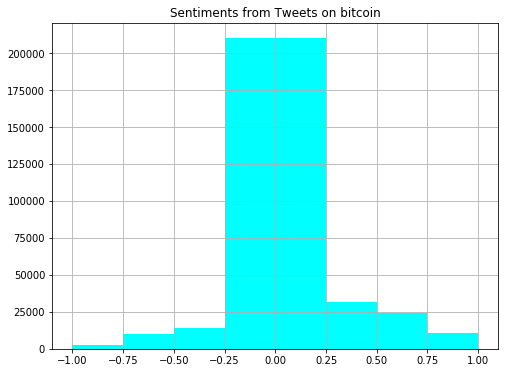

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
data.score.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             color="cyan")

plt.title("Sentiments from Tweets on bitcoin")
plt.savefig('sent.png')
plt.show()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
def top_20_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    return count_dict

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_df=.9,min_df=2)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['text'])
# Visualise the 10 most common words
top_20_words(count_data, count_vectorizer)

In [ ]:
count_vectorizer = CountVectorizer(max_df=.9,min_df=2,stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['text'])
# Visualise the 10 most common words
top_20_words(count_data, count_vectorizer)

In [61]:
data['m'] = data['timestamp'].dt.month
data['d'] = data['timestamp'].dt.day
data['h'] = data['timestamp'].dt.hour
data.head()

user               fullname             tweet-id  \
6581  itsdennian_bot  Bitcoin Price Tweeter  1111417671843631106   
6582    BitcoinRants            Chuck Steak  1111417658606391307   
6583  BitcoinNewsCom        BitcoinNews.com  1111417651941662720   
6584     dannycharts           Danny Charts  1111417624779321345   
6585   Petar21901979                  Petar  1111417617565126656   

               timestamp                                         url  likes  \
6581 2019-03-28 23:59:56  /itsdennian_bot/status/1111417671843631106      0   
6582 2019-03-28 23:59:53    /BitcoinRants/status/1111417658606391307      0   
6583 2019-03-28 23:59:52  /BitcoinNewsCom/status/1111417651941662720      0   
6584 2019-03-28 23:59:45     /dannycharts/status/1111417624779321345      0   
6585 2019-03-28 23:59:43   /Petar21901979/status/1111417617565126656      0   

      replies  retweets                                               text  \
6581        0         0                              279433 4039 3093 3597   
6582        0         0                             thought into thi tweet   
6583        0         0  london metal exchang support plan blockchain m...   
6584        0         0                                             gasbtc   
6585        0         0  check thi bitcoin ethereum fivestar hotel etor...   

                                                   html   score  m   d   h  
6581  <p class="TweetTextSize js-tweet-text tweet-te...  0.0000  3  28  23  
6582  <p class="TweetTextSize js-tweet-text tweet-te...  0.0000  3  28  23  
6583  <p class="TweetTextSize js-tweet-text tweet-te...  0.4019  3  28  23  
6584  <p class="TweetTextSize js-tweet-text tweet-te...  0.0000  3  28  23  
6585  <p class="TweetTextSize js-tweet-text tweet-te...  0.4019  3  28  23

In [64]:
score_per_day = data.groupby(['m','d','h']).agg('mean').score

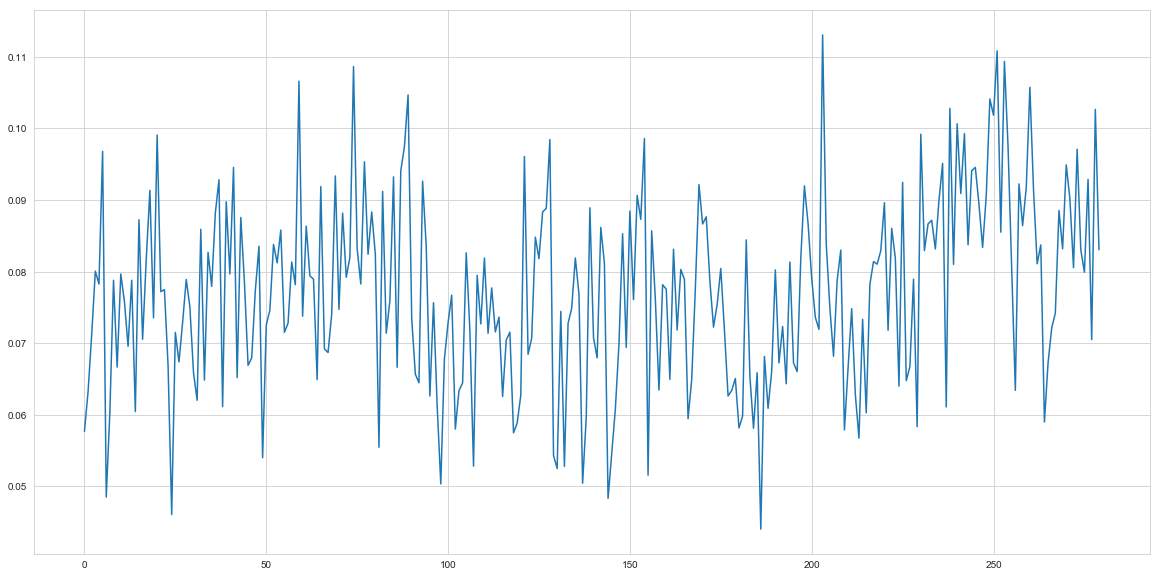

In [77]:
from matplotlib.pyplot import figure
figure(figsize=(20,10))
plt.plot(list(score_per_day))
plt.show()